In [ ]:
pip install tensorflow opencv-python matplotlib

In [ ]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/sentiment analysis dataset/data'

In [ ]:
os.listdir(data_dir)

['happy', 'sad']

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
os.listdir(os.path.join(data_dir,'happy'))

['the-habits-of-happy-people-a-meditation-day-course-611337.jpg',
 'Happy_People_Happy_Man.jpg',
 'images22.jpg',
 'image15.jpeg',
 'hqdefault.jpg',
 'brady-bunch-3.jpg',
 'habits-of-happy-people.jpg',
 'Screen-Shot-2012-10-23-at-12.57.22-PM.png',
 'happy-people21.jpg',
 'image26.jpeg',
 'o-HAPPY-facebook.jpg',
 'getty_505175324_2000131020009280246_158016.jpg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed.jpg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'getty_494581822_130796.jpg',
 'happypeople-1024x679.jpg',
 'maxresdefault.jpg',
 'hdptcar-fi-2.jpg',
 'THPC_Logo-jpeg.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'HAPPY-PEOPLE-CLUB-LOGO.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'smile.woman_.jpg',
 'young-and-happy-people-vector-15114154.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'bigstock-Portrai

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)

    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in exist in the list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with the image {}'.format(image_path))


In [ ]:
img = cv2.imread(os.path.join(data_dir,'happy','image15.jpeg'))

In [ ]:
img.shape

(183, 275, 3)

In [ ]:
import matplotlib.pyplot as plt

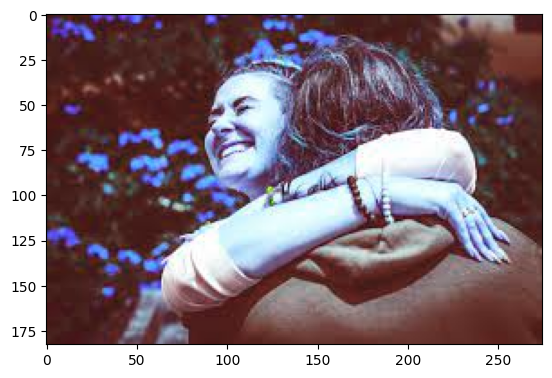

In [ ]:
plt.imshow(img)

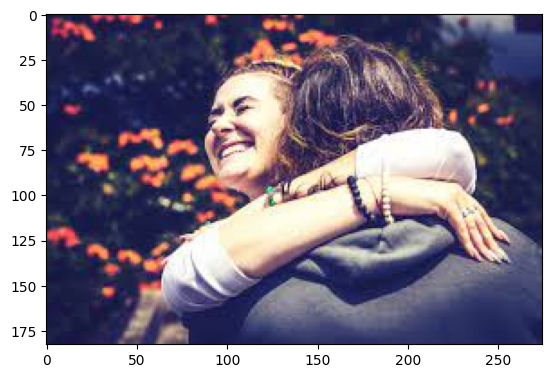

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
import numpy as np

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 169 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

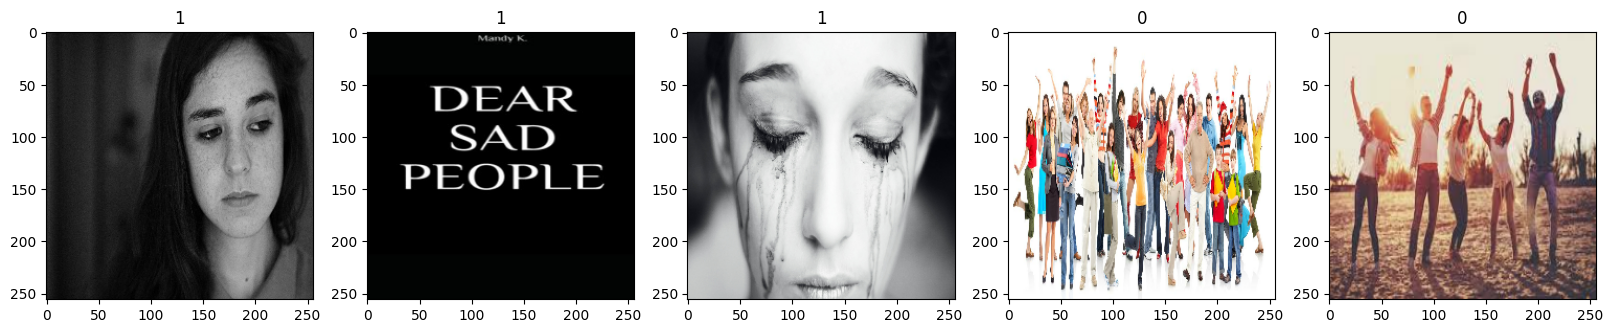

In [ ]:
fig,ax = plt.subplots(ncols=5,figsize = (20,20))
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
##scaling data


In [ ]:
data = data.map(lambda x,y:(x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

0.0

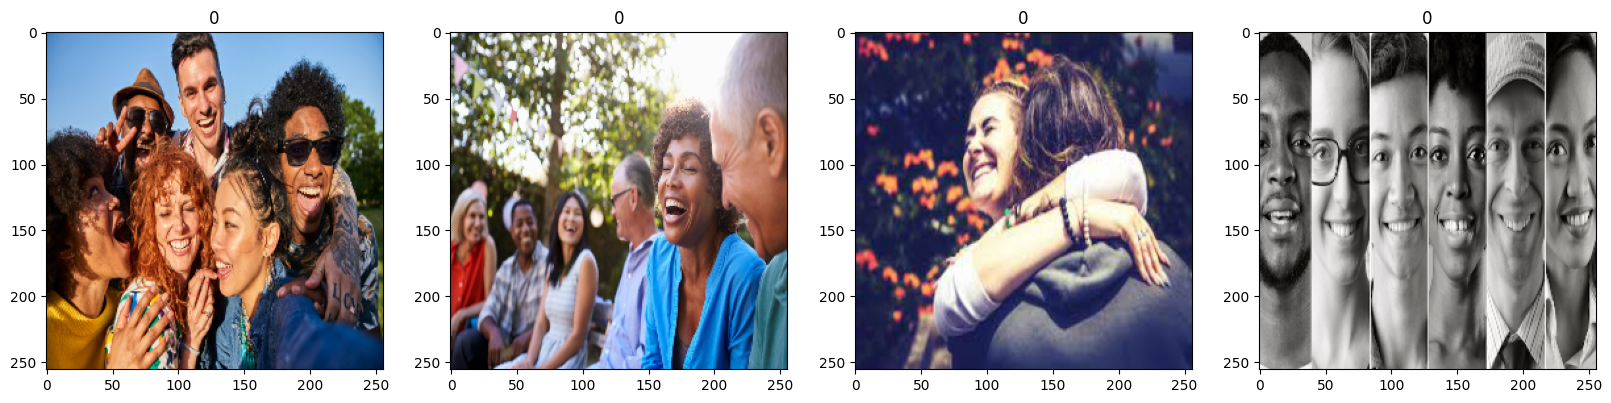

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

6

In [ ]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.2)

In [ ]:
train_size, val_size, test_size

(3, 2, 1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
## DEEP LEARNING

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential(
    [Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),

    Conv2D(32,(3,3),1,activation='relu'),
    MaxPooling2D(),

    Conv2D(16,(3,3),1,activation='relu'),
    MaxPooling2D(),

    Flatten(),

    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
model.compile(
    'adam',
    loss = tf.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs = 20, validation_data=val, callbacks = [tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 13s 1s/step - loss: 0.9994 - accuracy: 0.5000 - val_loss: 0.7768 - val_accuracy: 0.3594
Epoch 2/20
3/3 [==============================] - 6s 2s/step - loss: 0.7487 - accuracy: 0.4688 - val_loss: 0.6574 - val_accuracy: 0.6250
Epoch 3/20
3/3 [==============================] - 7s 1s/step - loss: 0.6378 - accuracy: 0.6458 - val_loss: 0.6795 - val_accuracy: 0.5469
Epoch 4/20
3/3 [==============================] - 8s 3s/step - loss: 0.6581 - accuracy: 0.5833 - val_loss: 0.5661 - val_accuracy: 0.7031
Epoch 5/20
3/3 [==============================] - 5s 1s/step - loss: 0.5500 - accuracy: 0.7188 - val_loss: 0.5093 - val_accuracy: 0.8594
Epoch 6/20
3/3 [==============================] - 8s 3s/step - loss: 0.4962 - accuracy: 0.7917 - val_loss: 0.4428 - val_accuracy: 0.7969
Epoch 7/20
3/3 [==============================] - 5s 1s/step - loss: 0.5131 - accuracy: 0.7812 - val_loss: 0.4790 - val_accuracy: 0.8594
Epoch 8/20
3/3 [========================

In [54]:
hist.history

{'loss': [0.9993610382080078,
  0.7487078309059143,
  0.6377524733543396,
  0.6580845713615417,
  0.5499589443206787,
  0.49617716670036316,
  0.5131469368934631,
  0.4540887773036957,
  0.3924805223941803,
  0.395460844039917,
  0.30964624881744385,
  0.30491048097610474,
  0.21858781576156616,
  0.22609464824199677,
  0.14152862131595612,
  0.11160243302583694,
  0.08388203382492065,
  0.05369303748011589,
  0.04259559139609337,
  0.05830487981438637],
 'accuracy': [0.5,
  0.46875,
  0.6458333134651184,
  0.5833333134651184,
  0.71875,
  0.7916666865348816,
  0.78125,
  0.7708333134651184,
  0.8333333134651184,
  0.8229166865348816,
  0.8645833134651184,
  0.875,
  0.9270833134651184,
  0.8854166865348816,
  0.9583333134651184,
  0.96875,
  0.9895833134651184,
  1.0,
  1.0,
  0.9895833134651184],
 'val_loss': [0.7767620086669922,
  0.6573767066001892,
  0.6794707775115967,
  0.5661279559135437,
  0.5092892050743103,
  0.4427584409713745,
  0.47903960943222046,
  0.38079833984375,
  0

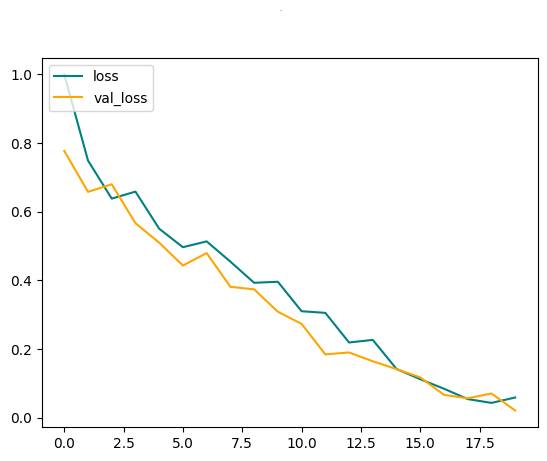

In [55]:
fig = plt.figure()

plt.plot(hist.history['loss'], color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=0)
plt.legend(loc='upper left')
plt.show()


In [56]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [57]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [58]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y, yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 362ms/step


In [65]:
import numpy
print(f'precision : {pre.result()}, recall : {re.result()}, Accuracy:{acc.result()}')

precision : 1.0, recall : 1.0, Accuracy:1.0


In [66]:
import cv2

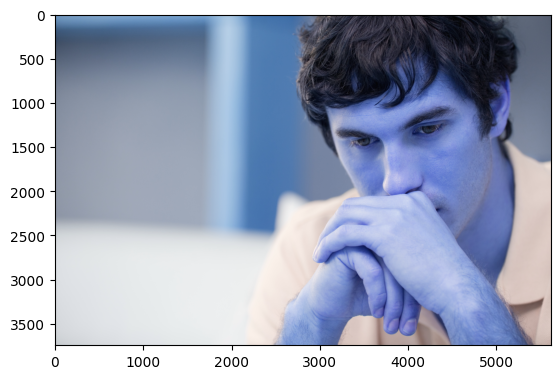

In [73]:
img = cv2.imread('sad.jpg')
plt.imshow(img)

In [74]:
resize = tf.image.resize(img,(256,256))

In [75]:
resize.shape

TensorShape([256, 256, 3])

In [76]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [77]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 19ms/step


In [78]:
yhat

array([[0.9945648]], dtype=float32)

In [81]:
from tensorflow.keras.models import load_model

In [82]:
model.save(os.path.join('models','sentiment_model.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
